**Nama :** Muhamad Taufiq Riza <br/>
**NIM  :** 402019611021 <br/>
**Mata Kuliah :** Natural language Processing

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow import keras

import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.metrics import sensitivity_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [93]:
df = pd.read_excel('sample_data/news.xlsx', header=0,index_col=0)
df.head()

,Article Title,Article Link,Article Content,Kategori
Nomor,,,,
1.0,"7 Hobi yang Bisa Datangkan Cuan di 2022, Ada H...",https://www.detik.com/edu/edutainment/d-588006...,Meski banyak orang menganggap hobi hanya sebat...,EDU
2.0,"Perbanyak Ahli Gunung Api, ITN Yogyakarta Buka...",https://www.detik.com/edu/perguruan-tinggi/d-5...,Institut Teknologi Nasional (ITN) Yogyakarta m...,EDU
3.0,"PTM Terbatas 2022 di Jakarta, Ini Aturan Kegia...",https://www.detik.com/edu/sekolah/d-5880075/pt...,Pemerintah Provinsi DKI Jakarta melalui Kepala...,EDU
4.0,Mengapa Perlu Menjaga Kelestarian Tanaman Baka...,https://www.detik.com/edu/detikpedia/d-5879161...,Tanaman bakau adalah salah satu ekosistem yang...,EDU
5.0,Cara Membuat Surat Lamaran Kerja yang Sempurna...,https://www.detik.com/edu/edutainment/d-587992...,Membuat Curriculum Vitae (CV) dan surat lamara...,EDU


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2493 entries, 1.0 to 2493.0
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Article Title    2493 non-null   object
 1   Article Link     2493 non-null   object
 2   Article Content  2493 non-null   object
 3   Kategori         2493 non-null   object
dtypes: object(4)
memory usage: 97.4+ KB


In [95]:
text_df = df[['Kategori', 'Article Content']]
text_df.head()

,Kategori,Article Content
Nomor,,
1.0,EDU,Meski banyak orang menganggap hobi hanya sebat...
2.0,EDU,Institut Teknologi Nasional (ITN) Yogyakarta m...
3.0,EDU,Pemerintah Provinsi DKI Jakarta melalui Kepala...
4.0,EDU,Tanaman bakau adalah salah satu ekosistem yang...
5.0,EDU,Membuat Curriculum Vitae (CV) dan surat lamara...


In [96]:
#shape of data:
text_df.shape

(2493, 2)

In [97]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2493 entries, 1.0 to 2493.0
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Kategori         2493 non-null   object
 1   Article Content  2493 non-null   object
dtypes: object(2)
memory usage: 58.4+ KB


In [98]:
#missing values:
text_df.isnull().sum()

Kategori           0
Article Content    0
dtype: int64

In [99]:
text_df['Article Content'][3]

'Pemerintah Provinsi DKI Jakarta melalui Kepala Dinas Pendidikan telah mengeluarkan aturan penyelenggaraan PTM Terbatas 2022. Aturan tersebut dikeluarkan melalui SK nomor 1363 tahun 2021 yang ditandatangani oleh Kadisdik Nahdiana 29 Desember 2021 lalu. Jika mengikuti kalender akademik dari Disdik DKI Jakarta, maka aturan tersebut sudah berlaku di sekolah Jakarta pada hari pertama atau awal semester genap TA 2021/2022 dimulai yakni Senin tanggal 3 Januari 2022. Berdasarkan SK yang dikeluarkan, sekolah di wilayah PPKM level 1 sampai 2 wajib menggelar sekolah tatap muka setiap hari dengan kapasitas siswa 100% dan durasi maksimal 6 jam pelajaran. Itu artinya seluruh wilayah DKI Jakarta yang saat ini berada pada PPKM level 1 sudah bisa menyelenggarakan PTM Terbatas dengan kapasitas siswa 100%. Bahkan siswa bisa melakukan sekolah tatap muka setiap hari dengan durasi belajar paling banyak 6 jam pelajaran per hari. Namun perlu dicatat, bahwa sekolah bisa mengikuti aturan 100% tersebut dengan s

In [100]:
text_df['Article Content'] = text_df['Article Content'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
print(text_df['Article Content'].apply(lambda x: len(x.split(' '))).sum())

718310


In [102]:
text_df['length'] = text_df['Article Content'].apply(len)
text_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Kategori,Article Content,length
Nomor,,,
1.0,EDU,Meski banyak orang menganggap hobi hanya sebat...,3834
2.0,EDU,Institut Teknologi Nasional (ITN) Yogyakarta m...,2511
3.0,EDU,Pemerintah Provinsi DKI Jakarta melalui Kepala...,2698
4.0,EDU,Tanaman bakau adalah salah satu ekosistem yang...,2535
5.0,EDU,Membuat Curriculum Vitae (CV) dan surat lamara...,2247


In [103]:
text_df.Kategori.unique()

array(['EDU', 'HOT', 'FNC', 'NEWS', 'BOLA', 'OTO'], dtype=object)

In [104]:
text_df.Kategori.value_counts()

HOT     501
NEWS    500
EDU     498
FNC     480
OTO     304
BOLA    210
Name: Kategori, dtype: int64

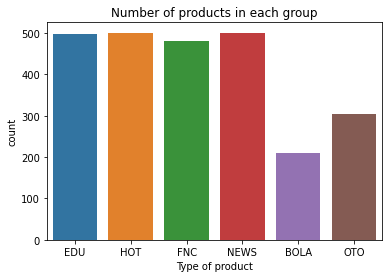

In [105]:
#Visualisasi data dalam bentuk diagram
sns.countplot(x='Kategori',data=text_df)
plt.xlabel('Type of product')
plt.title('Number of products in each group');

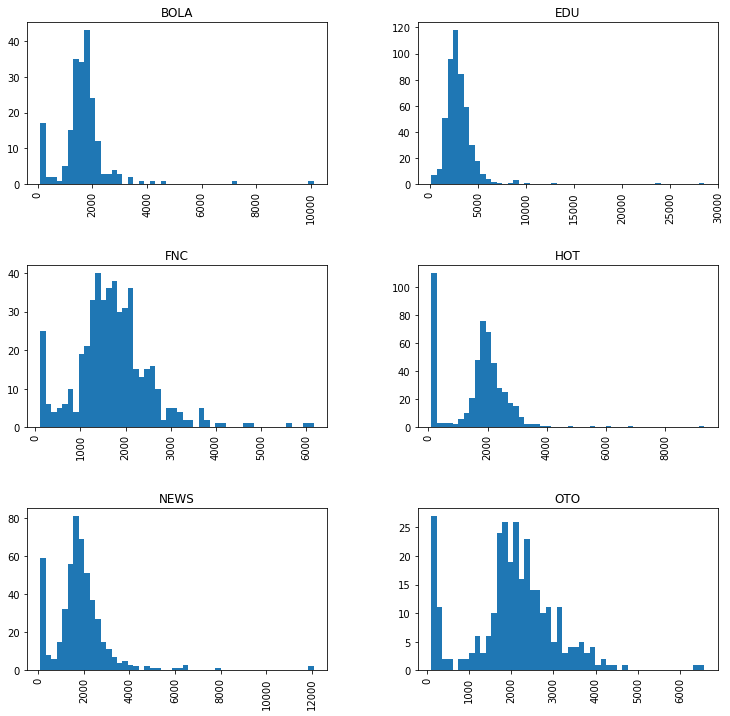

In [106]:
# Visualisasi data dalam bentuk Histogram
text_df.hist(column='length', by='Kategori', bins=50,figsize=(12,12));

# Text Pre-processing

# **Stemming**

In [107]:
stop = stopwords.words('indonesian')
print(stop[::10])

porter = PorterStemmer()

['ada', 'akhiri', 'antaranya', 'atas', 'bagaimanapun', 'banyak', 'begitukah', 'benarlah', 'berawal', 'berkehendak', 'bermula', 'berujar', 'bisakah', 'bung', 'dapat', 'di', 'dibuat', 'dijawab', 'dilakukan', 'dimulai', 'diperlihatkan', 'disebutkan', 'ditujukan', 'diungkapkan', 'gunakan', 'hendaklah', 'ingat', 'itulah', 'jawabnya', 'justru', 'kan', 'katanya', 'kelihatannya', 'kesampaian', 'kiranya', 'lalu', 'maka', 'masa', 'melakukan', 'memihak', 'mempertanyakan', 'menanya', 'mengapa', 'mengingat', 'menuju', 'menyebutkan', 'meyakinkan', 'mungkin', 'olehnya', 'pastilah', 'pertama', 'rasa', 'sama-sama', 'sayalah', 'sebaiknya', 'sebetulnya', 'sedemikian', 'sejak', 'sekalipun', 'sela', 'semacam', 'semisal', 'seolah-olah', 'seringnya', 'sesuatunya', 'setidak-tidaknya', 'sinilah', 'tahu', 'tanya', 'tentu', 'terhadap', 'terlihat', 'tetap', 'toh', 'umumnya', 'waktunya']


In [108]:
def remove_punctuation(description):
    """The function to remove punctuation"""
    table = str.maketrans('', '', string.punctuation)
    return description.translate(table)

def remove_stopwords(text):
    """The function to removing stopwords"""
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

def stemmer(stem_text):
    """The function to apply stemming"""
    stem_text = [porter.stem(word) for word in stem_text.split()]
    return " ".join(stem_text)

In [109]:
text_df['Article Content'] = text_df['Article Content'].apply(remove_punctuation)
text_df['Article Content'] = text_df['Article Content'].apply(remove_stopwords)
text_df['Article Content'] = text_df['Article Content'].apply(stemmer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [110]:
text_df.head()

,Kategori,Article Content,length
Nomor,,,
1.0,EDU,orang menganggap hobi sebata hiburan menghilan...,3834
2.0,EDU,institut teknolog nasion itn yogyakarta membuk...,2511
3.0,EDU,pemerintah provinsi dki jakarta kepala dina pe...,2698
4.0,EDU,tanaman bakau salah ekosistem tumbuh muara sun...,2535
5.0,EDU,curriculum vita cv surat lamaran kerja efektif...,2247


In [111]:
text_df['Article Content'][3]

'pemerintah provinsi dki jakarta kepala dina pendidikan mengeluarkan aturan penyelenggaraan ptm terbata 2022 aturan dikeluarkan sk nomor 1363 2021 ditandatangani kadisdik nahdiana 29 desemb 2021 mengikuti kalend akademik disdik dki jakarta aturan berlaku sekolah jakarta semest genap ta 20212022 senin tanggal 3 januari 2022 berdasarkan sk dikeluarkan sekolah wilayah ppkm level 1 2 wajib menggelar sekolah tatap muka kapasita siswa 100 durasi maksim 6 jam pelajaran wilayah dki jakarta ppkm level 1 menyelenggarakan ptm terbata kapasita siswa 100 siswa sekolah tatap muka durasi belajar 6 jam pelajaran dicatat sekolah mengikuti aturan 100 syarat minim 80 guru tenaga kependidikan sekolah menerima vaksin dosi 2 minim 50 warga masyarakat kabupaten kota sekolah divaksin ptm terbata kela dilaksanakan menerapkan protokol kesehatan diatur satuan pendidikan 1 masker sesuai ketentuan menutupi hidung mulut dagu 2 menerapkan jaga jarak orang danatau kursimeja 1 meter 3 menghindari kontak fisik 4 meminj

**# Pos Tagging**

In [112]:
tokens = text_df['Article Content'][3]

nltk.pos_tag(word_tokenize(tokens))

[('pemerintah', 'NN'),
 ('provinsi', 'NN'),
 ('dki', 'NN'),
 ('jakarta', 'NN'),
 ('kepala', 'NN'),
 ('dina', 'NN'),
 ('pendidikan', 'NN'),
 ('mengeluarkan', 'NN'),
 ('aturan', 'NN'),
 ('penyelenggaraan', 'NN'),
 ('ptm', 'NN'),
 ('terbata', 'NN'),
 ('2022', 'CD'),
 ('aturan', 'NN'),
 ('dikeluarkan', 'NN'),
 ('sk', 'NN'),
 ('nomor', 'NN'),
 ('1363', 'CD'),
 ('2021', 'CD'),
 ('ditandatangani', 'NN'),
 ('kadisdik', 'VBD'),
 ('nahdiana', 'JJ'),
 ('29', 'CD'),
 ('desemb', 'NN'),
 ('2021', 'CD'),
 ('mengikuti', 'NN'),
 ('kalend', 'VB'),
 ('akademik', 'JJ'),
 ('disdik', 'NN'),
 ('dki', 'NN'),
 ('jakarta', 'NN'),
 ('aturan', 'NN'),
 ('berlaku', 'NN'),
 ('sekolah', 'NN'),
 ('jakarta', 'NN'),
 ('semest', 'JJS'),
 ('genap', 'NN'),
 ('ta', 'NN'),
 ('20212022', 'CD'),
 ('senin', 'NN'),
 ('tanggal', 'NN'),
 ('3', 'CD'),
 ('januari', 'NN'),
 ('2022', 'CD'),
 ('berdasarkan', 'NN'),
 ('sk', 'NN'),
 ('dikeluarkan', 'NN'),
 ('sekolah', 'NN'),
 ('wilayah', 'NN'),
 ('ppkm', 'VBP'),
 ('level', 'NN'),
 ('1', 

**# Bag of words**

**CountVectorizer**

In [113]:
vectorizer = CountVectorizer()
vectorizer.fit(text_df['Article Content'])
vector = vectorizer.transform(text_df['Article Content'])

In [114]:
print(vector.shape)
print(vector.toarray())

(2493, 39548)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [115]:
tfidf_converter = TfidfTransformer()
X_tfidf = tfidf_converter.fit_transform(vector).toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [116]:
X = text_df['Article Content']
y = text_df['Kategori']
####
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [117]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1869,), (624,), (1869,), (624,))

**RNN**

In [118]:
t = Tokenizer()
t.fit_on_texts(X_train)

In [119]:
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
print(encoded_train[0:2])

[[3109, 95, 7662, 564, 4600, 4, 66, 2216, 4080, 11417, 636, 66, 19269, 19270], [5, 1096, 3651, 178, 95, 6285, 33, 2298, 1075, 11418, 1684, 4347, 5770, 1490, 1782, 7663, 11419, 607, 95, 5313, 5, 2299, 446, 5771, 3652, 157, 1005, 60, 8575, 95, 1491, 7663, 84, 4081, 15, 5772, 1006, 2, 5773, 348, 258, 375, 18, 157, 950, 1163, 390, 154, 1115, 762, 2, 6933, 348, 95, 157, 95, 1399, 4923, 1491, 36, 2978, 95, 5313, 1685, 5314, 7663, 3474, 951, 18, 4082, 139, 33, 987, 329, 157, 2008, 1838, 9727, 19271, 1163, 952, 113, 1839, 1302, 2852, 1686, 6934, 64, 3653, 19272, 309, 4083, 7664, 2077, 1687, 140, 11420, 5315, 1265, 8576, 250, 659, 233, 4924, 4348, 272, 2610, 3475, 400, 4924, 4348, 1783, 780, 2299, 4925, 2299, 446, 5771, 3652, 7665, 11, 154, 2009, 1373, 1732, 8576, 1164, 8577, 3654, 4349, 6935, 4924, 4348, 3476, 3655, 1115, 11, 15, 762, 2, 406, 154, 95, 637, 9728, 5316, 11420, 9727, 9729, 515, 250, 1115, 12, 15, 1115, 44, 15, 2, 9730, 154, 2, 19273, 154, 272, 95, 4926, 3655, 8578, 250, 54, 15, 1

In [120]:
max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
print(padded_train)

[[   66  2216  4080 ...    66 19269 19270]
 [ 7666  3478  1237 ...   446  5771  3652]
 [ 1616  1165  1211 ...  1492   216   842]
 ...
 [ 3308   231   385 ...  5092   764  5078]
 [ 4995  2467  3561 ...  3310  2467   764]
 [   59   383    32 ...   294  2103  3933]]


In [121]:
vocab_size = len(t.word_index) + 1# fit the model

model = Sequential()
model.add(Embedding(vocab_size, 24, input_length=max_length))
model.add(SimpleRNN(24, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='Article Content', metrics=['accuracy'])
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 8, 24)             881688    
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 24)                1176      
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 882,889
Trainable params: 882,889
Non-trainable params: 0
_________________________________________________________________
None


In [122]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

model.fit(x=padded_train,
         y=y_train,
         epochs=5,  
         validation_data=(padded_test, y_test), verbose=1,
         callbacks=[early_stop]
         )

Epoch 1/5


ValueError: ignored

In [123]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label') 

In [124]:
preds = (model.predict(padded_test) > 0.5).astype("int32")

In [125]:
c_report(y_test, preds)

Classification Report


ValueError: ignored

**LSTM**

In [126]:
vectorizer = CountVectorizer()

X_train,X_test, y_train, y_test = train_test_split(df['Article Content'],df['Kategori'],train_size=0.8,random_state=42)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [127]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='#$$%&()*+,-./:;<=>?@[\]^_{|}~', lower=True)
tokenizer.fit_on_texts(df['Article Content'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = tokenizer.texts_to_sequences(df['Article Content'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Found 43383 unique tokens.
Shape of data tensor: (2493, 250)


In [128]:
Y = pd.get_dummies(df['Kategori']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (2493, 6)


In [129]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2243, 250) (2243, 6)
(250, 250) (250, 6)


In [130]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5    
batch_size = 64

model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/5
32/32 [==============================] - 49s 1s/step - loss: 1.6985 - accuracy: 0.3191 - val_loss: 1.5894 - val_accuracy: 0.3778
Epoch 2/5
32/32 [==============================] - 46s 1s/step - loss: 1.3572 - accuracy: 0.4658 - val_loss: 1.3345 - val_accuracy: 0.4133
Epoch 3/5
32/32 [==============================] - 45s 1s/step - loss: 1.0089 - accuracy: 0.6269 - val_loss: 1.0919 - val_accuracy: 0.6400
Epoch 4/5
32/32 [==============================] - 45s 1s/step - loss: 0.6703 - accuracy: 0.8290 - val_loss: 0.8756 - val_accuracy: 0.6889
Epoch 5/5
32/32 [==============================] - 46s 1s/step - loss: 0.3169 - accuracy: 0.9371 - val_loss: 0.7632 - val_accuracy: 0.7200


In [131]:
y_pred = model.predict(X_test)
y_pred.shape

(250, 6)

**CNN**

In [133]:
max_words = 450